In [1]:
import scipy.io

try:
    ppc = scipy.io.loadmat(r'C:\Users\UmurY\OneDrive\Masaüstü\Action_Clusters_Python\Raw_Files\ROI\Sub1\allbetas_PPC_r0.2_Sub1.mat')
    print("Loaded actionbetasPMC.mat successfully.")
except Exception as e:
    print("Error loading actionbetasPMC.mat:", e)

try:
    pmc = scipy.io.loadmat(r'C:\Users\UmurY\OneDrive\Masaüstü\Action_Clusters_Python\Raw_Files\ROI\Sub1\allbetas_PMC_r0.2_Sub1.mat') 
    print("Loaded actionbetasPPC.mat successfully.")
except Exception as e:
    print("Error loading actionbetasPPC.mat:", e)

try:
    lotc = scipy.io.loadmat(r'C:\Users\UmurY\OneDrive\Masaüstü\Action_Clusters_Python\Raw_Files\ROI\Sub1\allbetas_LOTC_r0.2_Sub1.mat')
    print("Loaded actionbetasLOTC.mat successfully.")
except Exception as e:
    print("Error loading actionbetasLOTC.mat:", e)

try:
    lotc = lotc['allBetas']
    pmc = pmc['allBetas']
    ppc = ppc['allBetas']
    print("Accessed data in .mat files successfully.")
except Exception as e:
    print("Error accessing data in .mat files:", e)



Loaded actionbetasPMC.mat successfully.
Loaded actionbetasPPC.mat successfully.
Loaded actionbetasLOTC.mat successfully.
Accessed data in .mat files successfully.


In [2]:
#All in dataframes
import pandas as pd
import numpy as np

lotc = pd.DataFrame(lotc)
pmc = pd.DataFrame(pmc)
ppc = pd.DataFrame(ppc)


In [3]:
# Define the starting indices
act_indices = list(range(0, 1072, 67))

# Create a list of lists where each sublist is a range of indices
action_beta_indices = [list(range(i, i + 58)) for i in act_indices]
#flatten
action_beta_indices = [item for sublist in action_beta_indices for item in sublist]

In [4]:
action_beta_indices
ppc = ppc.iloc[ action_beta_indices,:]
pmc = pmc.iloc[ action_beta_indices,:]
lotc = lotc.iloc[ action_beta_indices,:]


#reset indexes
ppc = ppc.reset_index(drop=True)
pmc = pmc.reset_index(drop=True)
lotc = lotc.reset_index(drop=True)

In [5]:
#Match matlab indexixng for dfs and rows
lotc.columns = lotc.columns + 1
pmc.columns = pmc.columns + 1
ppc.columns = ppc.columns + 1

lotc.index = lotc.index + 1
pmc.index = pmc.index + 1
ppc.index = ppc.index + 1

In [6]:
#Match matlab indexixng for dfs and rows
lotc.columns = lotc.columns + 1
pmc.columns = pmc.columns + 1
ppc.columns = ppc.columns + 1

lotc.index = lotc.index + 1
pmc.index = pmc.index + 1
ppc.index = ppc.index + 1

In [7]:
nppc = pd.DataFrame(np.zeros((58, ppc.shape[1])))
nppc.columns = ppc.columns
nppc.index = ppc.index[0:58]

npmc = pd.DataFrame(np.zeros((58, pmc.shape[1])))
npmc.columns = pmc.columns
npmc.index = pmc.index[0:58]

nlotc = pd.DataFrame(np.zeros((58, lotc.shape[1])))
nlotc.columns = lotc.columns
nlotc.index = lotc.index[0:58]


In [8]:
for m in range(16):
    for i in range (58):
            nppc.iloc[i] += ppc.iloc[m*58+i]
            npmc.iloc[i] += pmc.iloc[m*58+i]
            nlotc.iloc[i] += lotc.iloc[m*58+i]

In [9]:
nppc=nppc/16
npmc=npmc/16
nlotc=nlotc/16


In [10]:
#Dissimilarity matrices for each region
from scipy.spatial.distance import pdist, squareform

lotc_dissim = pdist(nlotc, metric='correlation')
pmc_dissim = pdist(npmc, metric='correlation')
ppc_dissim = pdist(nppc, metric='correlation')

In [11]:
lotc_dissim

array([0.52001004, 0.54329633, 0.50066223, ..., 0.44394596, 0.533136  ,
       0.48392266])

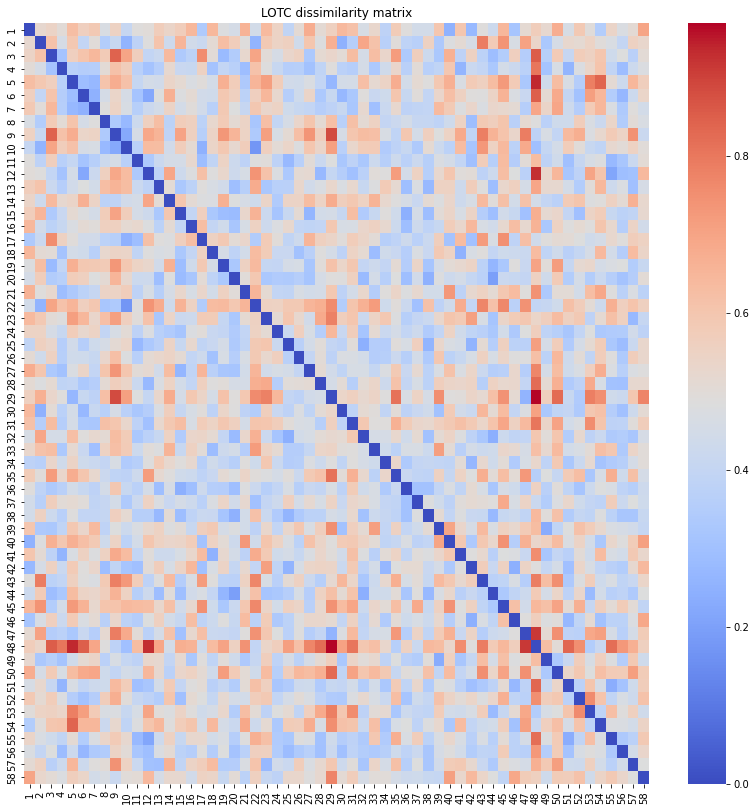

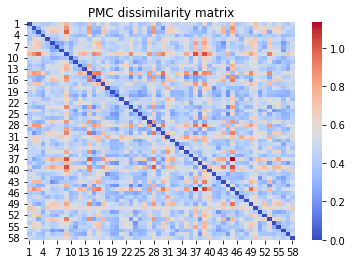

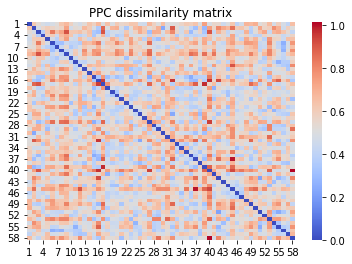

In [12]:
#Heatmaps for each region
import seaborn as sns
import matplotlib.pyplot as plt


#Bigger figures with bigger fonts and better resolution
plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = (20, 20)
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300

plt.figure(figsize=(14, 14))
lotc_dissim = squareform(lotc_dissim)
pmc_dissim = squareform(pmc_dissim)
ppc_dissim = squareform(ppc_dissim)



#make dissimliarity matrices dfs
lotc_dissim = pd.DataFrame(lotc_dissim)
pmc_dissim = pd.DataFrame(pmc_dissim)
ppc_dissim = pd.DataFrame(ppc_dissim)

#Increase indexes of dissimilarity matrices by 1
lotc_dissim.index = lotc_dissim.index + 1
pmc_dissim.index = pmc_dissim.index + 1
ppc_dissim.index = ppc_dissim.index + 1

lotc_dissim.columns = lotc_dissim.columns + 1
pmc_dissim.columns = pmc_dissim.columns + 1
ppc_dissim.columns = ppc_dissim.columns + 1


sns.heatmap(lotc_dissim, cmap='coolwarm')
plt.title('LOTC dissimilarity matrix')
plt.show()

sns.heatmap(pmc_dissim, cmap='coolwarm')
plt.title('PMC dissimilarity matrix')
plt.show()

sns.heatmap(ppc_dissim, cmap='coolwarm')
plt.title('PPC dissimilarity matrix')
plt.show()

In [13]:
ppc_dissim

,1,2,3,4,5,6,7,8,9,10,...,49,50,51,52,53,54,55,56,57,58
1,0.000000,0.618519,0.532141,0.478418,0.456953,0.478101,0.519668,0.625232,0.668529,0.577534,...,0.669547,0.701813,0.509416,0.552379,0.660776,0.470102,0.590336,0.475966,0.410570,0.651133
2,0.618519,0.000000,0.471415,0.552866,0.601888,0.565750,0.531066,0.571254,0.733212,0.465008,...,0.389694,0.520825,0.725944,0.566052,0.588382,0.782474,0.697455,0.451337,0.589866,0.504289
3,0.532141,0.471415,0.000000,0.372793,0.612505,0.829571,0.655347,0.730166,0.911376,0.616254,...,0.365629,0.517004,0.642224,0.724637,0.427208,0.682858,0.713967,0.633481,0.539550,0.411890
4,0.478418,0.552866,0.372793,0.000000,0.568373,0.596450,0.447759,0.660257,0.712240,0.624215,...,0.443109,0.400832,0.399499,0.561364,0.523106,0.506167,0.537778,0.428790,0.465921,0.566751
5,0.456953,0.601888,0.612505,0.568373,0.000000,0.472078,0.384086,0.623409,0.742395,0.477302,...,0.591683,0.682121,0.519366,0.388663,0.759800,0.575034,0.556700,0.438869,0.645827,0.640669
6,0.478101,0.565750,0.829571,0.596450,0.472078,0.000000,0.315834,0.313870,0.435689,0.399170,...,0.749179,0.718273,0.428260,0.455736,0.803484,0.541042,0.405649,0.253331,0.462415,0.765880
7,0.519668,0.531066,0.655347,0.447759,0.384086,0.315834,0.000000,0.435616,0.537359,0.350287,...,0.652359,0.701868,0.416287,0.434396,0.711238,0.525766,0.416977,0.295960,0.470995,0.646652
8,0.625232,0.571254,0.730166,0.660257,0.623409,0.313870,0.435616,0.000000,0.409929,0.446801,...,0.620459,0.640972,0.400459,0.604253,0.804577,0.619791,0.515743,0.261021,0.530094,0.780117
9,0.668529,0.733212,0.911376,0.712240,0.742395,0.435689,0.537359,0.409929,0.000000,0.451429,...,0.811429,0.668218,0.508647,0.673402,0.801856,0.625028,0.485589,0.414866,0.602387,0.671729
10,0.577534,0.465008,0.616254,0.624215,0.477302,0.399170,0.350287,0.446801,0.451429,0.000000,...,0.612462,0.607961,0.490268,0.365474,0.647469,0.546850,0.455720,0.405415,0.473089,0.545821


In [14]:
mapping = {
    1: 2,
    2: 4,
    3: 5,
    4: 7,
    5: 8,
    6: 12,
    7: 13,
    8: 15,
    9: 16,
    10: 17,
    11: 20,
    12: 21,
    13: 22,
    14: 23,
    15: 24,
    16: 27,
    17: 28,
    18: 31,
    19: 35,
    20: 36,
    21:40,
    22:41,
    23:42,
    24:44,
    25:46,
    26:47,
    27:48,
    28:49,
    29:50,
    30:51,
    31:53,
    32:55,
    33:57,
    34:58,
    35:59,
    36:62,
    37:63,
    38:64,
    39:68,
    40:70,
    41:71,
    42:72,
    43:74,
    44:75,
    45:77,
    46:78,
    47:82, 
    48 :85, 
    49 :87, 
    50 :88, 
    51 :89, 
    52 :92, 
    53 :94, 
    54 :95, 
    55 :96, 
    56 :98, 
    57 :99, 
    58 :100
}


groups = [
    ('passive_inter', [4, 35, 58, 63, 89, 94]),
    ('active_inter', [36, 42, 47, 59, 75, 98]),
    ('comm_symbolic', [40, 51, 57]),
    ('comm_vocal', [2, 28, 85, 95]),
    ('manipulation', [7, 12, 13, 31, 50, 53, 96]),
    ('modify_substrate', [22, 44, 46, 64, 99]),
    ('digestion', [17, 21, 41, 72,88,92]),
    ('skin_displacement', [15, 16, 23, 70]),
    ('aim_in_space', [8, 20, 49, 71, 78, 87, 100]),
    ('locomotion_b', [55, 62, 68]),
    ('locomotion_q', [5,24,27,48,74, 77, 82])
]
def rename_and_reorder(dissim, mapping, groups):
    dissim.rename(index=mapping, columns=mapping, inplace=True)
    order = [index for group in groups for index in group[1]]
    dissim = dissim.reindex(order)
    dissim = dissim[order]
    return dissim

# Apply the function to each DSM
ppc_dissim = rename_and_reorder(ppc_dissim, mapping, groups)
lotc_dissim = rename_and_reorder(lotc_dissim, mapping, groups)
pmc_dissim = rename_and_reorder(pmc_dissim, mapping, groups)


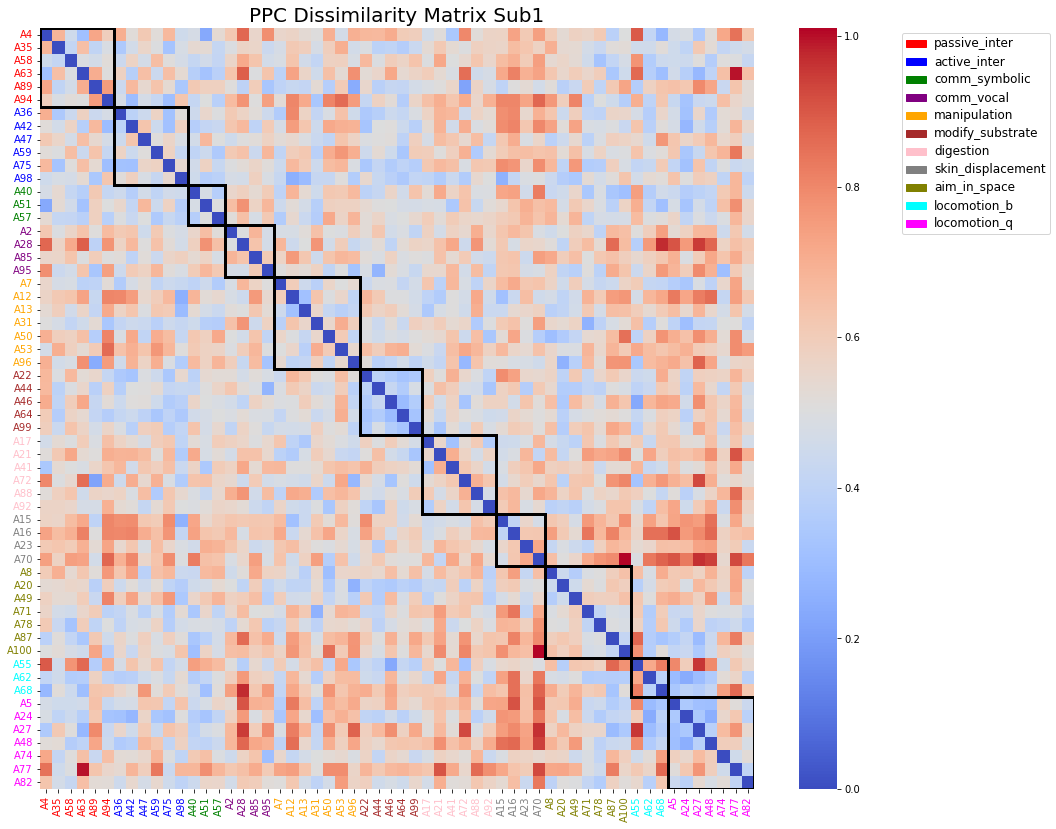

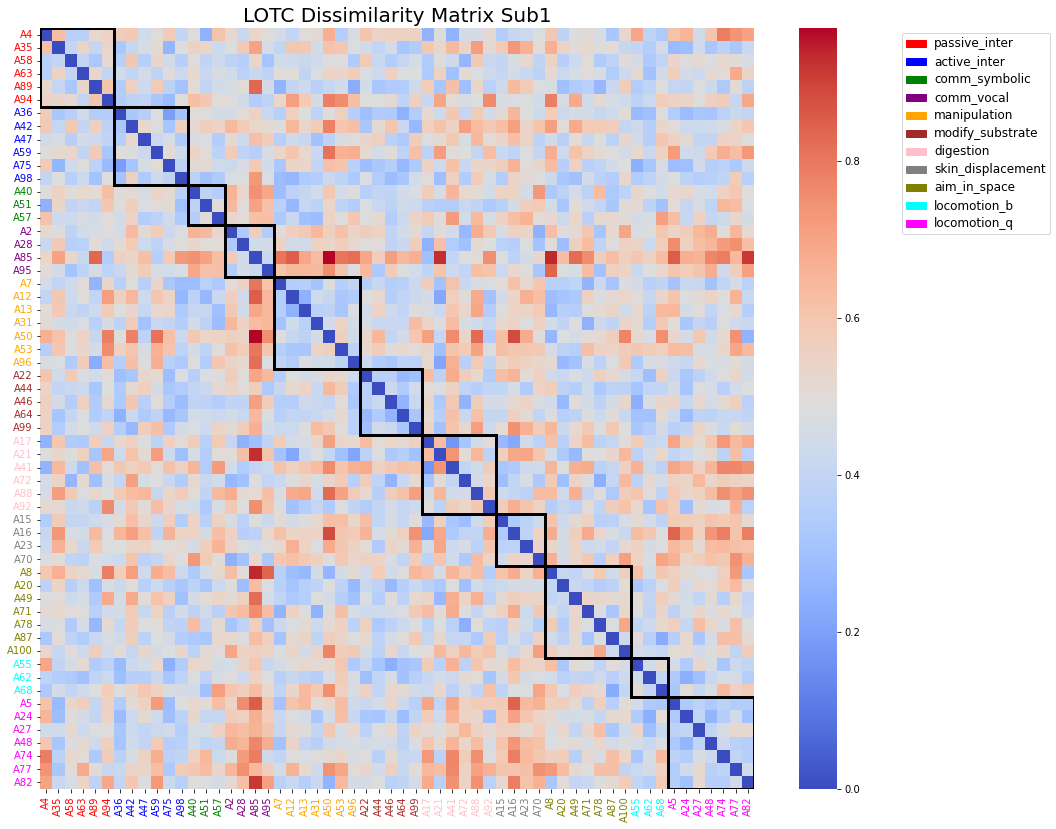

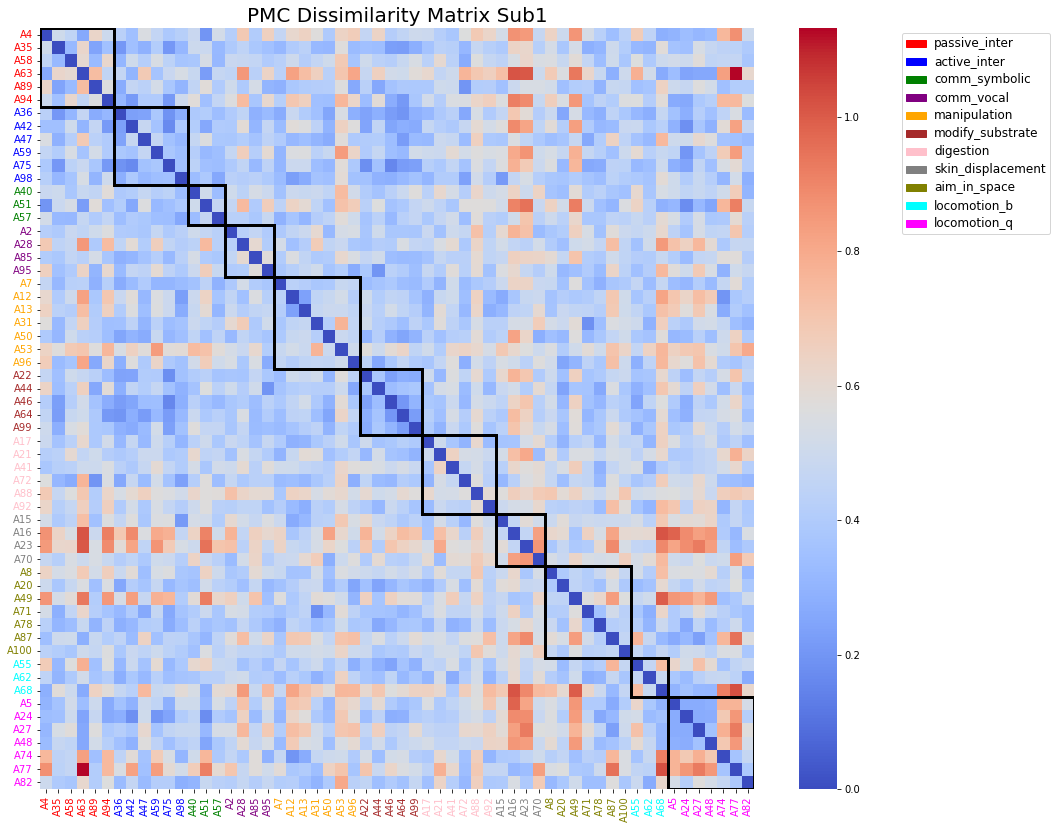

<Figure size 432x288 with 0 Axes>

In [15]:
import matplotlib.patches as mpatches

def generate_heatmap(scaled_df, groups, title):
    scaled_df.index = scaled_df.index.map(str).map('A{}'.format)
    scaled_df.columns = scaled_df.columns.map(str).map('A{}'.format)  
    plt.figure(figsize=(16, 14))
    heatmap=sns.heatmap(scaled_df, cmap='coolwarm')
    plt.title(title, fontsize=20)  # Add title here
    yticks = heatmap.get_yticklabels()
    xticks=heatmap.get_xticklabels()
    colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta']
    start = 0
    for j,(group_name,indexes) in enumerate(groups):
        end = start + len(indexes)
        for i in range(start,end):
            yticks[i].set_color(colors[j])
            xticks[i].set_color(colors[j])
        # Add a rectangle for the group
        heatmap.add_patch(plt.Rectangle((start, start), end-start, end-start, fill=False, edgecolor='black', lw=3))
        start = end
    heatmap.set_yticklabels(yticks)
    patches = [mpatches.Patch(color=colors[i], label=name) for i,(name,indexes) in enumerate(groups)]
    legend = plt.legend(handles=patches,bbox_to_anchor=(1.20,1), loc=2)
    plt.setp(legend.get_texts(), fontsize='large') 
    plt.show()


# Apply the function to each DSM with the correct title
generate_heatmap(ppc_dissim, groups, "PPC Dissimilarity Matrix Sub1")
generate_heatmap(lotc_dissim, groups, "LOTC Dissimilarity Matrix Sub1")
generate_heatmap(pmc_dissim, groups, "PMC Dissimilarity Matrix Sub1")

#Save images to C:\Users\UmurY\OneDrive\Masaüstü\Action_Clusters_Python\Result_Files\Clean DSM\Figures with their reliability threshold as well
plt.savefig(r'C:\Users\UmurY\OneDrive\Masaüstü\Action_Clusters_Python\Result_Files\Clean DSM\Figures\PPC Dissimilarity Matrix Sub1_r02.png')
plt.savefig(r'C:\Users\UmurY\OneDrive\Masaüstü\Action_Clusters_Python\Result_Files\Clean DSM\Figures\LOTC Dissimilarity Matrix Sub1_r02.png')
plt.savefig(r'C:\Users\UmurY\OneDrive\Masaüstü\Action_Clusters_Python\Result_Files\Clean DSM\Figures\PMC Dissimilarity Matrix Sub1_r02.png')

In [16]:
#Save the dissimilarity matrices to the path C:\Users\UmurY\OneDrive\Masaüstü\Action_Clusters_Python\Result_Files\Clean DSM
ppc_dissim.to_csv(r'C:\Users\UmurY\OneDrive\Masaüstü\Action_Clusters_Python\Result_Files\Clean DSM\ppc_dissim_rel02.csv')
lotc_dissim.to_csv(r'C:\Users\UmurY\OneDrive\Masaüstü\Action_Clusters_Python\Result_Files\Clean DSM\lotc_dissim_rel02.csv')
pmc_dissim.to_csv(r'C:\Users\UmurY\OneDrive\Masaüstü\Action_Clusters_Python\Result_Files\Clean DSM\pmc_dissim_rel02.csv')